## Libraries

In [63]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
from sklearn import metrics

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

## Import the data

In [64]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2015825,2508182,HH781001,11/15/2002 12:30:00 PM,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,False,1333,12.0,27.0,28.0,06,1165667.0,1902638.0,2002,02/28/2018 03:56:25 PM,41.888430,-87.667064,"(41.888429628, -87.667063831)"
1,2110300,2687361,HJ308830,04/18/2003 06:10:00 PM,016XX W 18TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,1222,12.0,25.0,31.0,08B,1165650.0,1891466.0,2003,02/10/2018 03:50:01 PM,41.857773,-87.667445,"(41.857773091, -87.667444544)"
2,381828,10755691,HZ518320,11/16/2016 09:50:00 PM,009XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1131,11.0,24.0,25.0,16,1144531.0,1895566.0,2016,02/10/2018 03:50:01 PM,41.869447,-87.744861,"(41.869447309, -87.744861466)"
3,6048052,8740111,HV415603,08/04/2012 05:15:00 PM,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,False,324,3.0,5.0,69.0,08B,1183801.0,1857416.0,2012,02/04/2016 06:33:39 AM,41.763932,-87.601884,"(41.763931739, -87.601884055)"
4,6873402,11924187,JC549979,12/16/2019 04:45:00 PM,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2433,24.0,40.0,77.0,14,1163394.0,1941667.0,2019,12/23/2019 03:56:38 PM,41.995575,-87.674309,"(41.995575459, -87.674309158)"


In [39]:
df.shape

(100000, 23)

## Look into the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
Unnamed: 0              100000 non-null int64
ID                      100000 non-null int64
Case Number             100000 non-null object
Date                    100000 non-null object
Block                   100000 non-null object
IUCR                    100000 non-null object
Primary Type            100000 non-null object
Description             100000 non-null object
Location Description    100000 non-null object
Arrest                  100000 non-null bool
Domestic                100000 non-null bool
Beat                    100000 non-null int64
District                100000 non-null float64
Ward                    100000 non-null float64
Community Area          100000 non-null float64
FBI Code                100000 non-null object
X Coordinate            100000 non-null float64
Y Coordinate            100000 non-null float64
Year                    100000 non-null int64


In [5]:
df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.000000e+05,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,3.816456e+06,7.109064e+06,1184.04701,11.289060,22.666100,37.606040,1.164563e+06,1.885634e+06,2009.902980,41.841777,-87.671642
std,2.062735e+06,3.050245e+06,701.25252,6.932335,13.842239,21.558465,1.618725e+04,3.137619e+04,5.328429,0.086290,0.058913
min,2.000000e+01,6.670000e+02,111.00000,1.000000,1.000000,1.000000,1.095120e+06,1.813910e+06,2001.000000,41.644608,-87.925509
25%,2.248785e+06,4.400725e+06,622.00000,6.000000,10.000000,23.000000,1.152897e+06,1.858914e+06,2005.000000,41.768308,-87.714015
50%,3.907453e+06,7.131744e+06,1033.00000,10.000000,22.000000,32.000000,1.165989e+06,1.890402e+06,2009.000000,41.854947,-87.666191
75%,5.565648e+06,9.765134e+06,1724.00000,17.000000,34.000000,58.000000,1.176363e+06,1.909042e+06,2014.000000,41.906276,-87.628291
max,7.295508e+06,1.231835e+07,2535.00000,31.000000,50.000000,77.000000,1.205116e+06,1.951503e+06,2021.000000,42.022536,-87.524529


In [6]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

The data, thus, contains no null values.

The Primary Type is what we need to identify. So we can use it later for testing purposes.

In [7]:
df['Primary Type'].value_counts()

THEFT                                20938
BATTERY                              18417
CRIMINAL DAMAGE                      11573
NARCOTICS                             9845
ASSAULT                               6448
OTHER OFFENSE                         6172
BURGLARY                              5692
MOTOR VEHICLE THEFT                   4460
DECEPTIVE PRACTICE                    4322
ROBBERY                               3784
CRIMINAL TRESPASS                     2860
WEAPONS VIOLATION                     1245
PROSTITUTION                           974
PUBLIC PEACE VIOLATION                 721
OFFENSE INVOLVING CHILDREN             651
CRIM SEXUAL ASSAULT                    378
SEX OFFENSE                            356
INTERFERENCE WITH PUBLIC OFFICER       253
GAMBLING                               183
ARSON                                  182
LIQUOR LAW VIOLATION                   164
HOMICIDE                               147
KIDNAPPING                              79
INTIMIDATIO

In [8]:
len(df['Primary Type'].unique())

31

Thus, we can expect around 30 clusters in our data based on type of crime

Other features for type of crime are IUCR codes, FBI codes and Description.

In [9]:
df['IUCR'].value_counts()

0486    8650
0820    7663
0460    6578
1320    5476
1310    5285
        ... 
1055       1
1450       1
1622       1
0937       1
4810       1
Name: IUCR, Length: 321, dtype: int64

In [10]:
len(df['IUCR'].unique())

321

In [11]:
df['FBI Code'].value_counts()

06     20938
08B    15792
14     11573
26      9928
18      9266
05      5692
08A     4876
07      4460
03      3784
11      3688
04B     2641
04A     1723
15      1251
16       975
24       807
10       575
02       469
17       440
20       386
19       187
09       180
22       164
01A      146
13        40
12        18
01B        1
Name: FBI Code, dtype: int64

In [12]:
len(df['FBI Code'].unique())

26

## Manual Feature Engineering

Location contains same information as Latitude and Longitude

Year contains same information as Date

In [65]:
# remove column location
df = df.drop(['Location', 'Year'], 1)
df.head()

/tmp/ipykernel_55137/131335252.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['Location', 'Year'], 1)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude
0,2015825,2508182,HH781001,11/15/2002 12:30:00 PM,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,False,1333,12.0,27.0,28.0,06,1165667.0,1902638.0,02/28/2018 03:56:25 PM,41.888430,-87.667064
1,2110300,2687361,HJ308830,04/18/2003 06:10:00 PM,016XX W 18TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,1222,12.0,25.0,31.0,08B,1165650.0,1891466.0,02/10/2018 03:50:01 PM,41.857773,-87.667445
2,381828,10755691,HZ518320,11/16/2016 09:50:00 PM,009XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1131,11.0,24.0,25.0,16,1144531.0,1895566.0,02/10/2018 03:50:01 PM,41.869447,-87.744861
3,6048052,8740111,HV415603,08/04/2012 05:15:00 PM,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,False,324,3.0,5.0,69.0,08B,1183801.0,1857416.0,02/04/2016 06:33:39 AM,41.763932,-87.601884
4,6873402,11924187,JC549979,12/16/2019 04:45:00 PM,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2433,24.0,40.0,77.0,14,1163394.0,1941667.0,12/23/2019 03:56:38 PM,41.995575,-87.674309


In [14]:
print(df.shape)
print(len(df['ID'].unique()))
print(len(df['Case Number'].unique()))
print(len(df["Unnamed: 0"].unique()))

(100000, 21)
100000
100000
100000


Thus, ID, Case Number and Unnamed: 0 are unique for each feature vector.

In [66]:
# remove columns ID and Case Number
df = df.drop(["ID", "Case Number", "Unnamed: 0"], 1)
df.head()

/tmp/ipykernel_55137/464464793.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["ID", "Case Number", "Unnamed: 0"], 1)


,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude
0,11/15/2002 12:30:00 PM,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,False,1333,12.0,27.0,28.0,06,1165667.0,1902638.0,02/28/2018 03:56:25 PM,41.888430,-87.667064
1,04/18/2003 06:10:00 PM,016XX W 18TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,1222,12.0,25.0,31.0,08B,1165650.0,1891466.0,02/10/2018 03:50:01 PM,41.857773,-87.667445
2,11/16/2016 09:50:00 PM,009XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1131,11.0,24.0,25.0,16,1144531.0,1895566.0,02/10/2018 03:50:01 PM,41.869447,-87.744861
3,08/04/2012 05:15:00 PM,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,False,324,3.0,5.0,69.0,08B,1183801.0,1857416.0,02/04/2016 06:33:39 AM,41.763932,-87.601884
4,12/16/2019 04:45:00 PM,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2433,24.0,40.0,77.0,14,1163394.0,1941667.0,12/23/2019 03:56:38 PM,41.995575,-87.674309


In [67]:
# Make features from Date and Updated On
df['Date'] = pd.to_datetime(df['Date'])
df['Updated On'] = pd.to_datetime(df['Updated On'])

df['Date Hour'] = df['Date'].dt.hour
df['Date Day'] = df['Date'].dt.day
df['Date Week'] = df['Date'].dt.week
df['Date Month'] = df['Date'].dt.month
df['Date Year'] = df['Date'].dt.year
df['Date DayofWeek'] = df['Date'].dt.dayofweek

df['Updated On Hour'] = df['Updated On'].dt.hour
df['Updated On Day'] = df['Updated On'].dt.day
df['Updated On Week'] = df['Updated On'].dt.week
df['Updated On Month'] = df['Updated On'].dt.month
df['Updated On Year'] = df['Updated On'].dt.year
df['Updated On DayofWeek'] = df['Updated On'].dt.dayofweek

df = df.drop(['Date', 'Updated On'], 1)

df.head()

/tmp/ipykernel_55137/2088358710.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Date Week'] = df['Date'].dt.week
/tmp/ipykernel_55137/2088358710.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Updated On Week'] = df['Updated On'].dt.week
/tmp/ipykernel_55137/2088358710.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['Date', 'Updated On'], 1)


,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Date Hour,Date Day,Date Week,Date Month,Date Year,Date DayofWeek,Updated On Hour,Updated On Day,Updated On Week,Updated On Month,Updated On Year,Updated On DayofWeek
0,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,False,1333,12.0,27.0,28.0,06,1165667.0,1902638.0,41.888430,-87.667064,12,15,46,11,2002,4,15,28,9,2,2018,2
1,016XX W 18TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,1222,12.0,25.0,31.0,08B,1165650.0,1891466.0,41.857773,-87.667445,18,18,16,4,2003,4,15,10,6,2,2018,5
2,009XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1131,11.0,24.0,25.0,16,1144531.0,1895566.0,41.869447,-87.744861,21,16,46,11,2016,2,15,10,6,2,2018,5
3,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,False,324,3.0,5.0,69.0,08B,1183801.0,1857416.0,41.763932,-87.601884,17,4,31,8,2012,5,6,4,5,2,2016,3
4,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2433,24.0,40.0,77.0,14,1163394.0,1941667.0,41.995575,-87.674309,16,16,51,12,2019,0,15,23,52,12,2019,0


In [68]:
# Make features on Block 
df['Block Name'] = df['Block'].apply(lambda x: x[8:])
df['Block Direction'] = df['Block'].apply(lambda x: x[6:7])
df = df.drop("Block", 1)
df.head()

/tmp/ipykernel_55137/2281929613.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("Block", 1)


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Date Hour,Date Day,Date Week,Date Month,Date Year,Date DayofWeek,Updated On Hour,Updated On Day,Updated On Week,Updated On Month,Updated On Year,Updated On DayofWeek,Block Name,Block Direction
0,0810,THEFT,OVER $500,STREET,False,False,1333,12.0,27.0,28.0,06,1165667.0,1902638.0,41.888430,-87.667064,12,15,46,11,2002,4,15,28,9,2,2018,2,ASHLAND AVE,N
1,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,1222,12.0,25.0,31.0,08B,1165650.0,1891466.0,41.857773,-87.667445,18,18,16,4,2003,4,15,10,6,2,2018,5,18TH ST,W
2,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1131,11.0,24.0,25.0,16,1144531.0,1895566.0,41.869447,-87.744861,21,16,46,11,2016,2,15,10,6,2,2018,5,CICERO AVE,S
3,0460,BATTERY,SIMPLE,OTHER,False,False,324,3.0,5.0,69.0,08B,1183801.0,1857416.0,41.763932,-87.601884,17,4,31,8,2012,5,6,4,5,2,2016,3,INGLESIDE AVE,S
4,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2433,24.0,40.0,77.0,14,1163394.0,1941667.0,41.995575,-87.674309,16,16,51,12,2019,0,15,23,52,12,2019,0,THOME AVE,W


In [69]:
# Binarise the Arrest and Domestic
df['Arrest'] = df['Arrest'].map({False:0, True:1}).astype(int)
df['Domestic'] = df['Domestic'].map({False:0, True:1}).astype(int)
df.head()

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Date Hour,Date Day,Date Week,Date Month,Date Year,Date DayofWeek,Updated On Hour,Updated On Day,Updated On Week,Updated On Month,Updated On Year,Updated On DayofWeek,Block Name,Block Direction
0,0810,THEFT,OVER $500,STREET,0,0,1333,12.0,27.0,28.0,06,1165667.0,1902638.0,41.888430,-87.667064,12,15,46,11,2002,4,15,28,9,2,2018,2,ASHLAND AVE,N
1,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,0,1,1222,12.0,25.0,31.0,08B,1165650.0,1891466.0,41.857773,-87.667445,18,18,16,4,2003,4,15,10,6,2,2018,5,18TH ST,W
2,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,1,0,1131,11.0,24.0,25.0,16,1144531.0,1895566.0,41.869447,-87.744861,21,16,46,11,2016,2,15,10,6,2,2018,5,CICERO AVE,S
3,0460,BATTERY,SIMPLE,OTHER,0,0,324,3.0,5.0,69.0,08B,1183801.0,1857416.0,41.763932,-87.601884,17,4,31,8,2012,5,6,4,5,2,2016,3,INGLESIDE AVE,S
4,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,0,0,2433,24.0,40.0,77.0,14,1163394.0,1941667.0,41.995575,-87.674309,16,16,51,12,2019,0,15,23,52,12,2019,0,THOME AVE,W


In [70]:
df.to_csv('prep_data.csv', index=False)

In [76]:
df = pd.read_csv("prep_data.csv")
df.head()

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Date Hour,Date Day,Date Week,Date Month,Date Year,Date DayofWeek,Updated On Hour,Updated On Day,Updated On Week,Updated On Month,Updated On Year,Updated On DayofWeek,Block Name,Block Direction
0,0810,THEFT,OVER $500,STREET,0,0,1333,12.0,27.0,28.0,06,1165667.0,1902638.0,41.888430,-87.667064,12,15,46,11,2002,4,15,28,9,2,2018,2,ASHLAND AVE,N
1,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,0,1,1222,12.0,25.0,31.0,08B,1165650.0,1891466.0,41.857773,-87.667445,18,18,16,4,2003,4,15,10,6,2,2018,5,18TH ST,W
2,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,1,0,1131,11.0,24.0,25.0,16,1144531.0,1895566.0,41.869447,-87.744861,21,16,46,11,2016,2,15,10,6,2,2018,5,CICERO AVE,S
3,0460,BATTERY,SIMPLE,OTHER,0,0,324,3.0,5.0,69.0,08B,1183801.0,1857416.0,41.763932,-87.601884,17,4,31,8,2012,5,6,4,5,2,2016,3,INGLESIDE AVE,S
4,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,0,0,2433,24.0,40.0,77.0,14,1163394.0,1941667.0,41.995575,-87.674309,16,16,51,12,2019,0,15,23,52,12,2019,0,THOME AVE,W


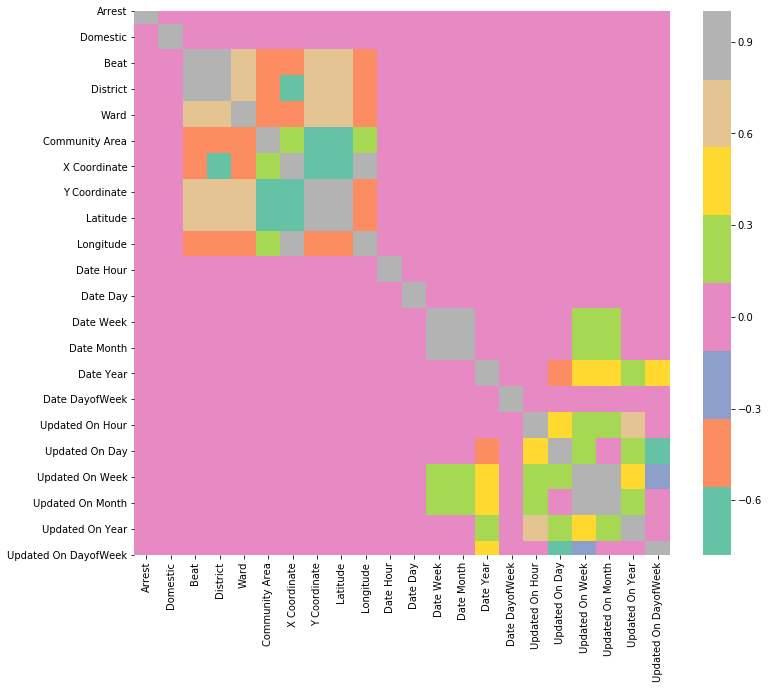

In [21]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Set2')

## Label Encoding

In [77]:
for col in ['IUCR', 'Primary Type', 'Description', 'FBI Code']:
    lbl = preprocessing.LabelEncoder()
    df[col] = lbl.fit_transform(df[col])
df.head()

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Date Hour,Date Day,Date Week,Date Month,Date Year,Date DayofWeek,Updated On Hour,Updated On Day,Updated On Week,Updated On Month,Updated On Year,Updated On DayofWeek,Block Name,Block Direction
0,74,29,238,STREET,0,0,1333,12.0,27.0,28.0,7,1165667.0,1902638.0,41.888430,-87.667064,12,15,46,11,2002,4,15,28,9,2,2018,2,ASHLAND AVE,N
1,44,2,137,SIDEWALK,0,1,1222,12.0,25.0,31.0,10,1165650.0,1891466.0,41.857773,-87.667445,18,18,16,4,2003,4,15,10,6,2,2018,5,18TH ST,W
2,159,23,315,STREET,1,0,1131,11.0,24.0,25.0,18,1144531.0,1895566.0,41.869447,-87.744861,21,16,46,11,2016,2,15,10,6,2,2018,5,CICERO AVE,S
3,34,2,309,OTHER,0,0,324,3.0,5.0,69.0,10,1183801.0,1857416.0,41.763932,-87.601884,17,4,31,8,2012,5,6,4,5,2,2016,3,INGLESIDE AVE,S
4,133,6,338,APARTMENT,0,0,2433,24.0,40.0,77.0,16,1163394.0,1941667.0,41.995575,-87.674309,16,16,51,12,2019,0,15,23,52,12,2019,0,THOME AVE,W


We now seperate the class labels(that are equivalent to type of crime) from the data. These can be later used to verify the clusters.

In [4]:
X = df.drop(["Primary Type", "Description", "IUCR", "FBI Code"], 1)
y1 = df["Primary Type"]
y2 = df["Description"]
y3 = df["IUCR"]
y4 = df["FBI Code"]

/tmp/ipykernel_55137/4283782194.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(["Primary Type", "Description", "IUCR", "FBI Code"], 1)


In [61]:
X.shape

(100000, 25)

## Ordinal Encoding

In [5]:
enc = preprocessing.OrdinalEncoder()
X = pd.DataFrame(enc.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,131.0,0.0,0.0,167.0,11.0,26.0,27.0,21009.0,31645.0,45638.0,37464.0,12.0,14.0,45.0,10.0,1.0,4.0,8.0,27.0,8.0,1.0,7.0,2.0,276.0,1.0
1,127.0,0.0,1.0,150.0,11.0,24.0,30.0,20994.0,26324.0,36716.0,37269.0,18.0,17.0,15.0,3.0,2.0,4.0,8.0,9.0,5.0,1.0,7.0,5.0,82.0,3.0
2,131.0,1.0,0.0,139.0,10.0,23.0,24.0,6478.0,27879.0,39005.0,9255.0,21.0,15.0,45.0,10.0,15.0,2.0,8.0,9.0,5.0,1.0,7.0,5.0,446.0,2.0
3,94.0,0.0,0.0,34.0,2.0,4.0,68.0,33963.0,12421.0,16760.0,63920.0,17.0,3.0,30.0,7.0,11.0,5.0,2.0,3.0,4.0,1.0,5.0,3.0,766.0,2.0
4,17.0,0.0,0.0,286.0,20.0,39.0,76.0,19222.0,47669.0,68814.0,34001.0,16.0,15.0,50.0,11.0,18.0,0.0,8.0,22.0,51.0,11.0,8.0,0.0,1325.0,3.0


## Scaling

In [6]:
scl = preprocessing.RobustScaler()
scl.fit(X)
X = pd.DataFrame(scl.transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.442308,0.0,0.0,0.273973,0.2,0.208333,-0.114286,-0.014721,0.261442,0.281706,-0.013314,-0.2,-0.066667,0.791667,0.8,-0.777778,0.25,0.0,1.000000,0.000000,0.0,0.0,-0.333333,-0.705548,-0.5
1,0.365385,0.0,1.0,0.157534,0.2,0.125000,-0.028571,-0.015579,0.019359,0.016259,-0.018718,0.4,0.133333,-0.458333,-0.6,-0.666667,0.25,0.0,0.000000,-1.000000,0.0,0.0,0.666667,-0.981508,0.5
2,0.442308,1.0,0.0,0.082192,0.1,0.083333,-0.200000,-0.845444,0.090105,0.084362,-0.794976,0.7,0.000000,0.791667,0.8,0.777778,-0.25,0.0,0.000000,-1.000000,0.0,0.0,0.666667,-0.463727,0.0
3,-0.269231,0.0,0.0,-0.636986,-0.7,-0.708333,1.057143,0.725846,-0.613171,-0.577470,0.719772,0.3,-0.800000,0.166667,0.2,0.333333,0.50,-6.0,-0.333333,-1.333333,0.0,-2.0,0.000000,-0.008535,0.0
4,-1.750000,0.0,0.0,1.089041,1.1,0.750000,1.285714,-0.116882,0.990469,0.971237,-0.109273,0.2,0.000000,1.000000,1.0,1.111111,-0.75,0.0,0.722222,14.333333,10.0,1.0,-1.000000,0.786629,0.5


In [26]:
"""scl = preprocessing.StandardScaler()
scl.fit(X)
X = scl.transform(X)"""

'scl = preprocessing.StandardScaler()\nscl.fit(X)\nX = scl.transform(X)'

In [27]:
"""scl = preprocessing.MinMaxScaler()
scl.fit(X)
X_ = scl.transform(X)"""

'scl = preprocessing.MinMaxScaler()\nscl.fit(X)\nX_ = scl.transform(X)'

## Clustering

In [ ]:
agg = cluster.AgglomerativeClustering(linkage='single').fit(X)

In [ ]:
opt = cluster.OPTICS().fit(X)

We first use k=27 to form the clusters. This is in accordance with the number of unique primary types.

In [33]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)

In [34]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [45]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.017959799503585956
NMI(Description): 0.042143410141584924
NMI(IUCR): 0.03828315346078318
NMI(FBI Code): 0.017048869984860913


Elbow Method to determine k

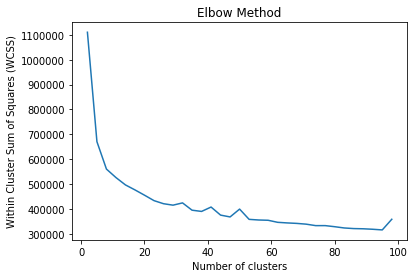

In [46]:
wcss = []

for i in range(2, 100, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 100, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

The Elbow method suggests we use $k\approx 7$

In [47]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 7, random_state = 0)

In [48]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [49]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.0062231406727738785
NMI(Description): 0.01730024051534201
NMI(IUCR): 0.014034738030181381
NMI(FBI Code): 0.006077247660756284


k=10

In [50]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)

In [51]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [52]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.012558479664190235
NMI(Description): 0.027951019635748097
NMI(IUCR): 0.024821587566483484
NMI(FBI Code): 0.012119791817179761


The elbow method seems to give worse results. So, now we experiment with different k values.

k=25

In [53]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 25, random_state = 0)

In [54]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [55]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.01666570040861584
NMI(Description): 0.03721267445681993
NMI(IUCR): 0.0342137778037049
NMI(FBI Code): 0.01593106854585698


k=20

In [56]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 20, random_state = 0)

In [57]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [58]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.014772096183388986
NMI(Description): 0.034717082352582175
NMI(IUCR): 0.030587773946550732
NMI(FBI Code): 0.01422399859557118


k=100

In [59]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)

In [60]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [61]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.024648874034136885
NMI(Description): 0.06072712790351581
NMI(IUCR): 0.05717620310494303
NMI(FBI Code): 0.023509914112226717


$k=100$ gives better results.

k=50

In [62]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 50, random_state = 0)

In [63]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [64]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.019649320276693243
NMI(Description): 0.04795904295204002
NMI(IUCR): 0.044119090545441074
NMI(FBI Code): 0.01852560232503758


k=200

In [65]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 200, random_state = 0)

In [66]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [67]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.033491664841800786
NMI(Description): 0.077817961469761
NMI(IUCR): 0.07530074313098503
NMI(FBI Code): 0.031802671563934196


Again, $k=200$ gives better results. Somehow, higher $k$ is giving better results.

## Dimension Reduction

In [70]:
X.shape

(100000, 25)

PCA with 5 components

In [74]:
pca = decomposition.PCA(n_components=5)
# Determine transformed features
X_pca_5 = pca.fit_transform(X)

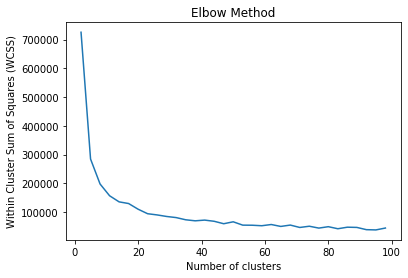

In [81]:
wcss = []

for i in range(2, 100, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_pca_5)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 100, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

k=10

In [82]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)

In [83]:
mbkmeans.fit(X_pca_5)
mbk_pred = mbkmeans.predict(X_pca_5)

In [84]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.007200865135554138
NMI(Description): 0.019814825092864797
NMI(IUCR): 0.0164097998062751
NMI(FBI Code): 0.0069195941914406665


k=100

In [85]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_pca_5)
mbk_pred = mbkmeans.predict(X_pca_5)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.017482402950835918
NMI(Description): 0.051250680745940747
NMI(IUCR): 0.047974897162042715
NMI(FBI Code): 0.01674316401603379


k=200

In [86]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 200, random_state = 0)
mbkmeans.fit(X_pca_5)
mbk_pred = mbkmeans.predict(X_pca_5)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.023506585163531237
NMI(Description): 0.06842620466970352
NMI(IUCR): 0.06605127221598876
NMI(FBI Code): 0.02248813639656284


k=30

In [87]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_pca_5)
mbk_pred = mbkmeans.predict(X_pca_5)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.010263325301902182
NMI(Description): 0.02934056466200518
NMI(IUCR): 0.02560741686798913
NMI(FBI Code): 0.009784318191547644


PCA with 10 components

In [75]:
pca = decomposition.PCA(n_components=10)
# Determine transformed features
X_pca_10 = pca.fit_transform(X)

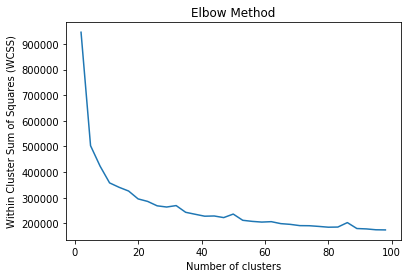

In [79]:
wcss = []

for i in range(2, 100, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_pca_10)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 100, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

k=10

In [88]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)
mbkmeans.fit(X_pca_10)
mbk_pred = mbkmeans.predict(X_pca_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.009568034394168257
NMI(Description): 0.02377004929302079
NMI(IUCR): 0.020654606642400434
NMI(FBI Code): 0.009367670390002903


k=30

In [89]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_pca_10)
mbk_pred = mbkmeans.predict(X_pca_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.01620891136288788
NMI(Description): 0.039046506582013946
NMI(IUCR): 0.03609347338809565
NMI(FBI Code): 0.01560774198192174


k=100

In [90]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_pca_10)
mbk_pred = mbkmeans.predict(X_pca_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.021862635534085732
NMI(Description): 0.05686952770475132
NMI(IUCR): 0.054141931937771295
NMI(FBI Code): 0.020838581061965674


k=200

In [91]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 200, random_state = 0)
mbkmeans.fit(X_pca_10)
mbk_pred = mbkmeans.predict(X_pca_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.025526277687068614
NMI(Description): 0.07025618556819145
NMI(IUCR): 0.06824773384390706
NMI(FBI Code): 0.024481379100357564


PCA with 15 components

In [76]:
pca = decomposition.PCA(n_components=15)
# Determine transformed features
X_pca_15 = pca.fit_transform(X)

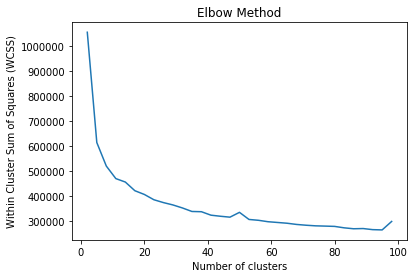

In [80]:
wcss = []

for i in range(2, 100, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_pca_5)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 100, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

k=10

In [92]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)
mbkmeans.fit(X_pca_15)
mbk_pred = mbkmeans.predict(X_pca_15)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.007006284758233516
NMI(Description): 0.0200253453327614
NMI(IUCR): 0.016706082531330314
NMI(FBI Code): 0.006879799952257456


k=30

In [93]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_pca_15)
mbk_pred = mbkmeans.predict(X_pca_15)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.015224730551621423
NMI(Description): 0.03798002404942439
NMI(IUCR): 0.03444352850998454
NMI(FBI Code): 0.014706753701048226


k=100

In [94]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_pca_15)
mbk_pred = mbkmeans.predict(X_pca_15)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.024440795064880182
NMI(Description): 0.06025375865211125
NMI(IUCR): 0.05699587731774831
NMI(FBI Code): 0.023038518217566497


## Binning

n_bins=7

In [101]:
est = preprocessing.KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
est.fit(X)
X_bin_7 = est.transform(X)

In [102]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_bin_7)
mbk_pred = mbkmeans.predict(X_bin_7)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.11245179283930413
NMI(Description): 0.1384804191280034
NMI(IUCR): 0.1370979459557884
NMI(FBI Code): 0.10603042665286322


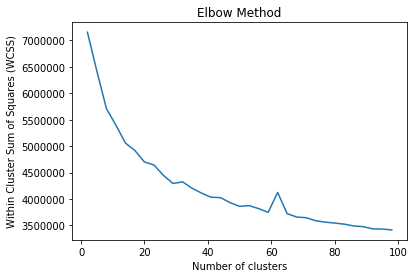

In [103]:
wcss = []

for i in range(2, 100, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_bin_7)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 100, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [104]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_bin_7)
mbk_pred = mbkmeans.predict(X_bin_7)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.10918781115845297
NMI(Description): 0.14844340889805002
NMI(IUCR): 0.14726197640258043
NMI(FBI Code): 0.10332749536549056


In [105]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 40, random_state = 0)
mbkmeans.fit(X_bin_7)
mbk_pred = mbkmeans.predict(X_bin_7)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.11488918626739202
NMI(Description): 0.14428438177729974
NMI(IUCR): 0.1427381217544598
NMI(FBI Code): 0.10805225687022071


In [106]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 70, random_state = 0)
mbkmeans.fit(X_bin_7)
mbk_pred = mbkmeans.predict(X_bin_7)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.10569850128628533
NMI(Description): 0.14074767104923583
NMI(IUCR): 0.1394707386394332
NMI(FBI Code): 0.09994590740445937


In [107]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)
mbkmeans.fit(X_bin_7)
mbk_pred = mbkmeans.predict(X_bin_7)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.11993521422956623
NMI(Description): 0.12910137336019625
NMI(IUCR): 0.12842269877834808
NMI(FBI Code): 0.1122999881671647


n_bins=3

In [7]:
est = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X)
X_bin_3 = est.transform(X)

In [8]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_bin_3)
mbk_pred = mbkmeans.predict(X_bin_3)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.064723359987629
NMI(Description): 0.08621040914553785
NMI(IUCR): 0.08469645722471061
NMI(FBI Code): 0.06091187851752487


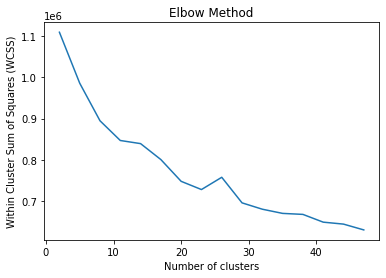

In [11]:
wcss = []

for i in range(2, 50, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_bin_3)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 50, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [12]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_bin_3)
mbk_pred = mbkmeans.predict(X_bin_3)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.08524659376762617
NMI(Description): 0.12165284350453419
NMI(IUCR): 0.1202556195498926
NMI(FBI Code): 0.08035187805664094


In [13]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 40, random_state = 0)
mbkmeans.fit(X_bin_3)
mbk_pred = mbkmeans.predict(X_bin_3)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.06948507342351848
NMI(Description): 0.09137533966322235
NMI(IUCR): 0.08943485104038844
NMI(FBI Code): 0.06509968452730036


In [14]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 70, random_state = 0)
mbkmeans.fit(X_bin_3)
mbk_pred = mbkmeans.predict(X_bin_3)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.08277231654351924
NMI(Description): 0.1134626004626946
NMI(IUCR): 0.11188218210113603
NMI(FBI Code): 0.07769704403277206


In [15]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)
mbkmeans.fit(X_bin_3)
mbk_pred = mbkmeans.predict(X_bin_3)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.010264864314044799
NMI(Description): 0.019818820618837635
NMI(IUCR): 0.018821782593084105
NMI(FBI Code): 0.00967700823206655


n_bins=10

In [16]:
est = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
est.fit(X)
X_bin_10 = est.transform(X)

In [17]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_bin_10)
mbk_pred = mbkmeans.predict(X_bin_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.11306242083748083
NMI(Description): 0.13806486483334587
NMI(IUCR): 0.13642678696213176
NMI(FBI Code): 0.10649456928945866


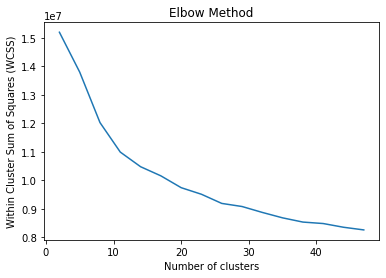

In [18]:
wcss = []

for i in range(2, 50, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_bin_10)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 50, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [20]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_bin_10)
mbk_pred = mbkmeans.predict(X_bin_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.10717551217002781
NMI(Description): 0.1458631099048116
NMI(IUCR): 0.1446956762944346
NMI(FBI Code): 0.10137148671217652


In [21]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 40, random_state = 0)
mbkmeans.fit(X_bin_10)
mbk_pred = mbkmeans.predict(X_bin_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.11162062112005308
NMI(Description): 0.13892951969830028
NMI(IUCR): 0.13732991439017525
NMI(FBI Code): 0.10523035011989555


In [22]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 70, random_state = 0)
mbkmeans.fit(X_bin_10)
mbk_pred = mbkmeans.predict(X_bin_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.10821269630403561
NMI(Description): 0.14297748129376564
NMI(IUCR): 0.14177520280797629
NMI(FBI Code): 0.10207278137383


In [24]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 25, random_state = 0)
mbkmeans.fit(X_bin_10)
mbk_pred = mbkmeans.predict(X_bin_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")
print(f"NMI(Description): {metrics.normalized_mutual_info_score(y2, mbk_pred, average_method='arithmetic')}")
print(f"NMI(IUCR): {metrics.normalized_mutual_info_score(y3, mbk_pred, average_method='arithmetic')}")
print(f"NMI(FBI Code): {metrics.normalized_mutual_info_score(y4, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.10440645529208267
NMI(Description): 0.12511341284850047
NMI(IUCR): 0.12318294741584018
NMI(FBI Code): 0.09810642279062591


## Heirarchical Clustering

In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y1, test_size=0.7,random_state=42)
X_train.shape

(30000, 25)

In [46]:
dbs = cluster.DBSCAN(eps=0.5, min_samples=5)

In [47]:
dbs_pred = dbs.fit_predict(X_train)

In [48]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.0
n_cluster = 1


In [49]:
dbs = cluster.DBSCAN(eps=0.2, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.0
n_cluster = 1


In [50]:
dbs = cluster.DBSCAN(eps=0.3, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.0
n_cluster = 1


In [51]:
dbs = cluster.DBSCAN(eps=0.7, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.010005874314306431
n_cluster = 49


In [52]:
dbs = cluster.DBSCAN(eps=0.8, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.04189843159387393
n_cluster = 205


In [53]:
dbs = cluster.DBSCAN(eps=1, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.0909050146139351
n_cluster = 241


In [54]:
dbs = cluster.DBSCAN(eps=1.2, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.02686279689640948
n_cluster = 99


Try with different seed of split

In [55]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y1, test_size=0.6,random_state=0)
X_train.shape

(40000, 25)

In [56]:
dbs = cluster.DBSCAN(eps=0.5, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.00019395252529067142
n_cluster = 2


In [57]:
dbs = cluster.DBSCAN(eps=1, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.09774564743986913
n_cluster = 303


In [58]:
dbs = cluster.DBSCAN(eps=0.7, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.014521997897955581
n_cluster = 98


# Only remove Primary type for testing

In [78]:
X = df.drop("Primary Type", 1)
y = df["Primary Type"]

/tmp/ipykernel_55137/2057714055.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop("Primary Type", 1)


In [79]:
enc = preprocessing.OrdinalEncoder()
X = pd.DataFrame(enc.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,74.0,238.0,131.0,0.0,0.0,167.0,11.0,26.0,27.0,7.0,21009.0,31645.0,45638.0,37464.0,12.0,14.0,45.0,10.0,1.0,4.0,8.0,27.0,8.0,1.0,7.0,2.0,276.0,1.0
1,44.0,137.0,127.0,0.0,1.0,150.0,11.0,24.0,30.0,10.0,20994.0,26324.0,36716.0,37269.0,18.0,17.0,15.0,3.0,2.0,4.0,8.0,9.0,5.0,1.0,7.0,5.0,82.0,3.0
2,159.0,315.0,131.0,1.0,0.0,139.0,10.0,23.0,24.0,18.0,6478.0,27879.0,39005.0,9255.0,21.0,15.0,45.0,10.0,15.0,2.0,8.0,9.0,5.0,1.0,7.0,5.0,446.0,2.0
3,34.0,309.0,94.0,0.0,0.0,34.0,2.0,4.0,68.0,10.0,33963.0,12421.0,16760.0,63920.0,17.0,3.0,30.0,7.0,11.0,5.0,2.0,3.0,4.0,1.0,5.0,3.0,766.0,2.0
4,133.0,338.0,17.0,0.0,0.0,286.0,20.0,39.0,76.0,16.0,19222.0,47669.0,68814.0,34001.0,16.0,15.0,50.0,11.0,18.0,0.0,8.0,22.0,51.0,11.0,8.0,0.0,1325.0,3.0


In [80]:
scl = preprocessing.RobustScaler()
scl.fit(X)
X = pd.DataFrame(scl.transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.089744,0.000000,0.442308,0.0,0.0,0.273973,0.2,0.208333,-0.114286,-0.333333,-0.014721,0.261442,0.281706,-0.013314,-0.2,-0.066667,0.791667,0.8,-0.777778,0.25,0.0,1.000000,0.000000,0.0,0.0,-0.333333,-0.705548,-0.5
1,-0.474359,-0.587209,0.365385,0.0,1.0,0.157534,0.2,0.125000,-0.028571,0.000000,-0.015579,0.019359,0.016259,-0.018718,0.4,0.133333,-0.458333,-0.6,-0.666667,0.25,0.0,0.000000,-1.000000,0.0,0.0,0.666667,-0.981508,0.5
2,1.000000,0.447674,0.442308,1.0,0.0,0.082192,0.1,0.083333,-0.200000,0.888889,-0.845444,0.090105,0.084362,-0.794976,0.7,0.000000,0.791667,0.8,0.777778,-0.25,0.0,0.000000,-1.000000,0.0,0.0,0.666667,-0.463727,0.0
3,-0.602564,0.412791,-0.269231,0.0,0.0,-0.636986,-0.7,-0.708333,1.057143,0.000000,0.725846,-0.613171,-0.577470,0.719772,0.3,-0.800000,0.166667,0.2,0.333333,0.50,-6.0,-0.333333,-1.333333,0.0,-2.0,0.000000,-0.008535,0.0
4,0.666667,0.581395,-1.750000,0.0,0.0,1.089041,1.1,0.750000,1.285714,0.666667,-0.116882,0.990469,0.971237,-0.109273,0.2,0.000000,1.000000,1.0,1.111111,-0.75,0.0,0.722222,14.333333,10.0,1.0,-1.000000,0.786629,0.5


In [81]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)

In [82]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [83]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.17697618940346885


Elbow Method to determine k

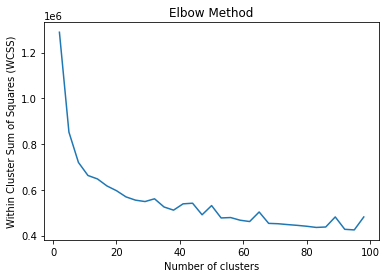

In [84]:
wcss = []

for i in range(2, 100, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 100, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

The Elbow method suggests we use $k\approx 7$

In [85]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 7, random_state = 0)

In [86]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [87]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.19951534635307608


k=10

In [88]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)

In [89]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [90]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.2014220536474912


The elbow method seems to give worse results. So, now we experiment with different k values.

k=25

In [91]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 25, random_state = 0)

In [92]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [93]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.20237589223458494


k=20

In [94]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 20, random_state = 0)

In [95]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [96]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.17596666524019317


k=100

In [97]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)

In [98]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [99]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.20892953722675933


$k=100$ gives better results.

k=50

In [100]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 50, random_state = 0)

In [101]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [102]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.18698568239097307


k=200

In [103]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 200, random_state = 0)

In [104]:
mbkmeans.fit(X)
mbk_pred = mbkmeans.predict(X)

In [105]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.19424497335385815


Again, $k=200$ gives better results. Somehow, higher $k$ is giving better results.

## Dimension Reduction

In [106]:
X.shape

(100000, 28)

PCA with 5 components

In [107]:
pca = decomposition.PCA(n_components=5)
# Determine transformed features
X_pca_5 = pca.fit_transform(X)

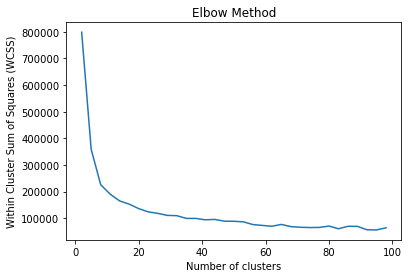

In [108]:
wcss = []

for i in range(2, 100, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_pca_5)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 100, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

k=10

In [109]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)

In [110]:
mbkmeans.fit(X_pca_5)
mbk_pred = mbkmeans.predict(X_pca_5)

In [111]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.2311320947218261


k=100

In [112]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_pca_5)
mbk_pred = mbkmeans.predict(X_pca_5)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.24751726554319017


k=200

In [113]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 200, random_state = 0)
mbkmeans.fit(X_pca_5)
mbk_pred = mbkmeans.predict(X_pca_5)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.25208999871054133


k=30

In [114]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_pca_5)
mbk_pred = mbkmeans.predict(X_pca_5)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.23218567457732006


PCA with 10 components

In [115]:
pca = decomposition.PCA(n_components=10)
# Determine transformed features
X_pca_10 = pca.fit_transform(X)

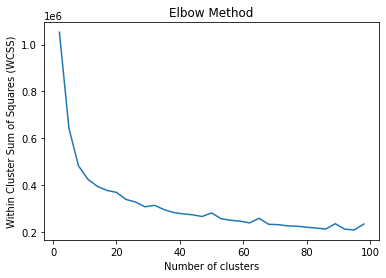

In [116]:
wcss = []

for i in range(2, 100, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_pca_10)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 100, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

k=10

In [117]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)
mbkmeans.fit(X_pca_10)
mbk_pred = mbkmeans.predict(X_pca_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.19712322482851907


k=30

In [118]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_pca_10)
mbk_pred = mbkmeans.predict(X_pca_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.19755074064801267


k=100

In [119]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_pca_10)
mbk_pred = mbkmeans.predict(X_pca_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.21194678206702


k=200

In [120]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 200, random_state = 0)
mbkmeans.fit(X_pca_10)
mbk_pred = mbkmeans.predict(X_pca_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y1, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.2064198720304763


PCA with 15 components

In [121]:
pca = decomposition.PCA(n_components=15)
# Determine transformed features
X_pca_15 = pca.fit_transform(X)

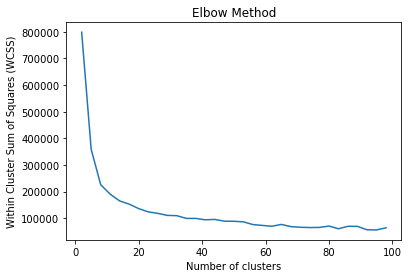

In [122]:
wcss = []

for i in range(2, 100, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_pca_5)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 100, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

k=10

In [123]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)
mbkmeans.fit(X_pca_15)
mbk_pred = mbkmeans.predict(X_pca_15)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.22273387679283252


k=30

In [124]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_pca_15)
mbk_pred = mbkmeans.predict(X_pca_15)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.20017196943765056


k=100

In [125]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_pca_15)
mbk_pred = mbkmeans.predict(X_pca_15)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.20586628452139263


## Binning

n_bins=7

In [126]:
est = preprocessing.KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
est.fit(X)
X_bin_7 = est.transform(X)

In [127]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_bin_7)
mbk_pred = mbkmeans.predict(X_bin_7)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.18359278393205772


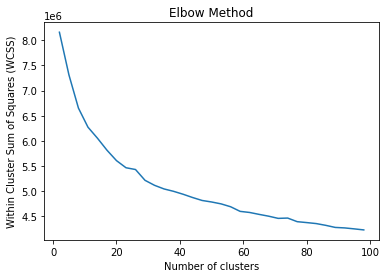

In [128]:
wcss = []

for i in range(2, 100, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_bin_7)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 100, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [129]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_bin_7)
mbk_pred = mbkmeans.predict(X_bin_7)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.1881736430174102


In [130]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 40, random_state = 0)
mbkmeans.fit(X_bin_7)
mbk_pred = mbkmeans.predict(X_bin_7)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.16071252050263124


In [131]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 70, random_state = 0)
mbkmeans.fit(X_bin_7)
mbk_pred = mbkmeans.predict(X_bin_7)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.177069676464528


In [132]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 10, random_state = 0)
mbkmeans.fit(X_bin_7)
mbk_pred = mbkmeans.predict(X_bin_7)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.1042076574120982


n_bins=10

In [133]:
est = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
est.fit(X)
X_bin_10 = est.transform(X)

In [134]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 30, random_state = 0)
mbkmeans.fit(X_bin_10)
mbk_pred = mbkmeans.predict(X_bin_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.14208517634022919


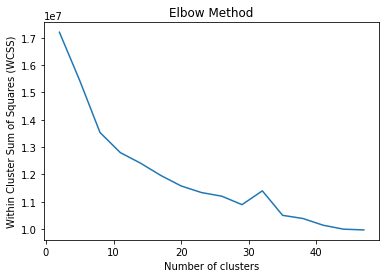

In [135]:
wcss = []

for i in range(2, 50, 3):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_bin_10)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 50, 3), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [136]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 100, random_state = 0)
mbkmeans.fit(X_bin_10)
mbk_pred = mbkmeans.predict(X_bin_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.1710192350839743


In [137]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 40, random_state = 0)
mbkmeans.fit(X_bin_10)
mbk_pred = mbkmeans.predict(X_bin_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.14155559579927865


In [138]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 70, random_state = 0)
mbkmeans.fit(X_bin_10)
mbk_pred = mbkmeans.predict(X_bin_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.15525657502095344


In [139]:
mbkmeans = cluster.MiniBatchKMeans(n_clusters = 25, random_state = 0)
mbkmeans.fit(X_bin_10)
mbk_pred = mbkmeans.predict(X_bin_10)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y, mbk_pred, average_method='arithmetic')}")

NMI(Primary Type): 0.13462571800919487


## Heirarchical Clustering

In [140]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.7,random_state=42)
X_train.shape

(30000, 28)

In [141]:
dbs = cluster.DBSCAN(eps=0.5, min_samples=5)

In [142]:
dbs_pred = dbs.fit_predict(X_train)

In [143]:
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.0
n_cluster = 1


In [144]:
dbs = cluster.DBSCAN(eps=0.2, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.0
n_cluster = 1


In [145]:
dbs = cluster.DBSCAN(eps=0.3, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.0
n_cluster = 1


In [146]:
dbs = cluster.DBSCAN(eps=0.7, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.0
n_cluster = 1


In [147]:
dbs = cluster.DBSCAN(eps=0.8, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.003883969918791498
n_cluster = 13


In [148]:
dbs = cluster.DBSCAN(eps=1, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.07490997066426018
n_cluster = 135


In [149]:
dbs = cluster.DBSCAN(eps=1.2, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.14927264887029967
n_cluster = 197


Try with different seed of split

In [150]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.6,random_state=0)
X_train.shape

(40000, 28)

In [151]:
dbs = cluster.DBSCAN(eps=0.5, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.00019395252529067142
n_cluster = 2


In [152]:
dbs = cluster.DBSCAN(eps=1, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.09043399399624932
n_cluster = 247


In [153]:
dbs = cluster.DBSCAN(eps=0.7, min_samples=5)
dbs_pred = dbs.fit_predict(X_train)
print(f"NMI(Primary Type): {metrics.normalized_mutual_info_score(y_train, dbs_pred, average_method='arithmetic')}")
print(f"n_cluster = {len(np.unique(dbs.labels_))}")

NMI(Primary Type): 0.0007722619103536397
n_cluster = 4


In [154]:
X.shape

(100000, 28)